In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))


heroes = pd.read_csv('heroes.csv', sep=';', index_col=0)
heroes_with_year = heroes[heroes['First appearance'] < 2020]

heroes_with_year.head()

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
Agent Bob,Bob,NaN,Marvel Comics,178.25,81.45,M,2007.0,Brown,Brown,10.0,low
Abe Sapien,Abraham Sapien,NaN,Dark Horse Comics,191.24,65.35,M,1993.0,Blue,No Hair,30.0,high
Abin Sur,NaN,Ungara,DC Comics,185.52,90.90,M,1959.0,Blue,No Hair,90.0,average
Animal Man,Bernhard Baker,NaN,DC Comics,183.80,83.39,M,1965.0,Blue,Blond,50.0,average


In [5]:
#FREQUENZE ASSOLUTE

In [30]:
heroes_with_year['Publisher'].value_counts()

Marvel Comics        205
DC Comics            121
Dark Horse Comics     12
George Lucas          11
ABC Studios            4
Image Comics           3
Rebellion              1
Star Trek              1
Universal Studios      1
Hanna-Barbera          1
Name: Publisher, dtype: int64

In [8]:
#Visualizzazione migliore
publisher_freq = pd.crosstab(index=heroes_with_year['Publisher'],
                             columns=['Abs. frequence'],
                             colnames=[''])
publisher_freq

,Abs. frequence
Publisher,
ABC Studios,4
DC Comics,121
Dark Horse Comics,12
George Lucas,11
Hanna-Barbera,1
Image Comics,3
Marvel Comics,205
Rebellion,1
Star Trek,1


In [31]:
gender_freq = pd.crosstab(index=heroes_with_year['Gender'],
                          columns=['Abs. frequence'],
                          colnames=[''])
gender_freq

,Abs. frequence
Gender,
F,87
M,272


In [9]:
#FREQUENZE RELATIVE

In [10]:
publisher_abs_freq = pd.crosstab(index=heroes_with_year['Publisher'],
                                 columns=['Rel. frequence'],
                                 colnames=[''])
publisher_rel_freq = publisher_abs_freq / publisher_abs_freq.sum()

publisher_rel_freq

,Rel. frequence
Publisher,
ABC Studios,0.011111
DC Comics,0.336111
Dark Horse Comics,0.033333
George Lucas,0.030556
Hanna-Barbera,0.002778
Image Comics,0.008333
Marvel Comics,0.569444
Rebellion,0.002778
Star Trek,0.002778


In [11]:
#Implementazione 'diretta'
publisher_rel_freq = pd.crosstab(index=heroes_with_year['Publisher'],
                                 columns=['Rel. frequence'],
                                 colnames=[''],
                                 normalize=True)
publisher_rel_freq

,Rel. frequence
Publisher,
ABC Studios,0.011111
DC Comics,0.336111
Dark Horse Comics,0.033333
George Lucas,0.030556
Hanna-Barbera,0.002778
Image Comics,0.008333
Marvel Comics,0.569444
Rebellion,0.002778
Star Trek,0.002778


In [12]:
#Visualizzazione migliore
publisher_rel_freq.apply(lambda p: 100 * np.round(p, 3))

,Rel. frequence
Publisher,
ABC Studios,1.1
DC Comics,33.6
Dark Horse Comics,3.3
George Lucas,3.1
Hanna-Barbera,0.3
Image Comics,0.8
Marvel Comics,56.9
Rebellion,0.3
Star Trek,0.3


In [13]:
#Visualizzazione percentuale
(publisher_rel_freq.apply(lambda p: np.round(100*p, 2))
                   .astype(str)
                   .apply(lambda s: s + '%'))

,Rel. frequence
Publisher,
ABC Studios,1.11%
DC Comics,33.61%
Dark Horse Comics,3.33%
George Lucas,3.06%
Hanna-Barbera,0.28%
Image Comics,0.83%
Marvel Comics,56.94%
Rebellion,0.28%
Star Trek,0.28%


In [14]:
#GRAFICI A BARRE

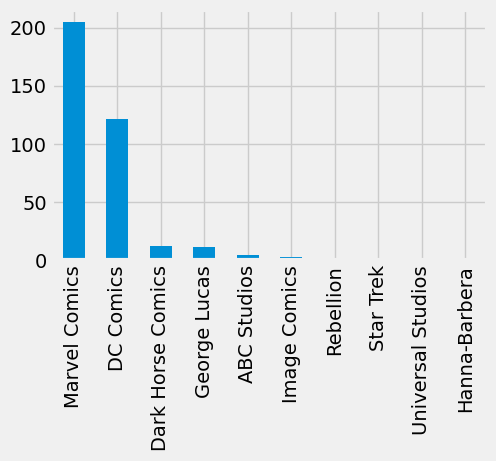

In [15]:
heroes_with_year['Publisher'].value_counts().plot.bar()
plt.show()

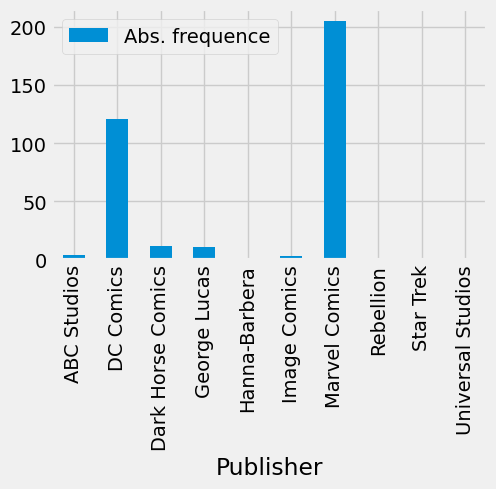

In [17]:
#Invocando plot.bar direttamente sul dataframe
publisher_freq.plot.bar()
plt.show()

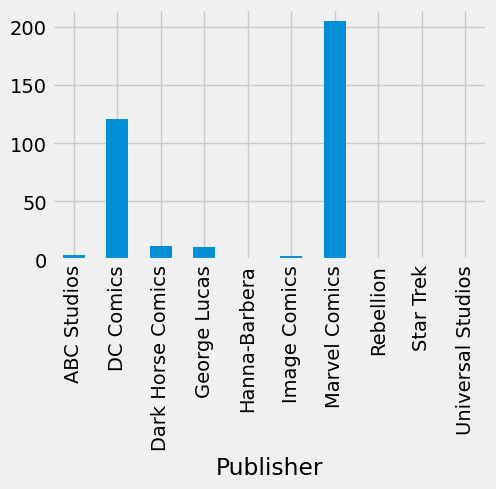

In [18]:
#Senza legenda
publisher_freq.plot.bar(legend=False)
plt.show()

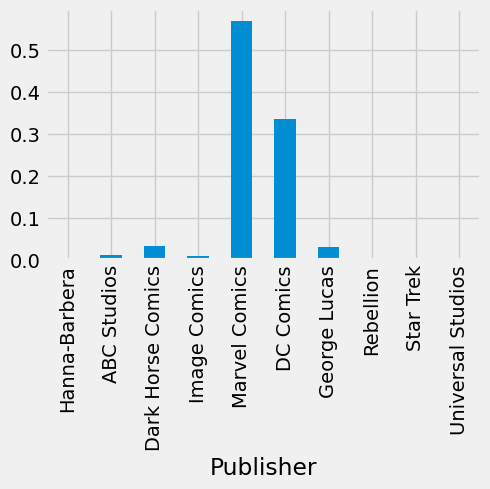

In [19]:
#Visualizzazione barre in un ordine specificato
publisher_order = ['Hanna-Barbera', 'ABC Studios', 'Dark Horse Comics',
                   'Image Comics', 'Marvel Comics', 'DC Comics',
                   'George Lucas', 'Rebellion', 
                   'Star Trek', 'Universal Studios']

publisher_rel_freq.loc[publisher_order,:].plot.bar(legend=False)
plt.show()

In [20]:
#Frequenze relative per situazioni di variabilità del numero di osservazioni
male_strength_freq = pd.crosstab(index=heroes.loc[heroes['Gender']=='M',
                                                  'Strength'],
                                 columns='Abs. freq.')
female_strength_freq = pd.crosstab(index=heroes.loc[heroes['Gender']=='F',
                                                    'Strength'],
                                   columns='Abs. freq.')

num_male = sum(male_strength_freq['Abs. freq.'])
num_female = sum(female_strength_freq['Abs. freq.'])

print('Ci sono {} supereroi e {} supereroine'.format(num_male, num_female))

Ci sono 428 supereroi e 164 supereroine


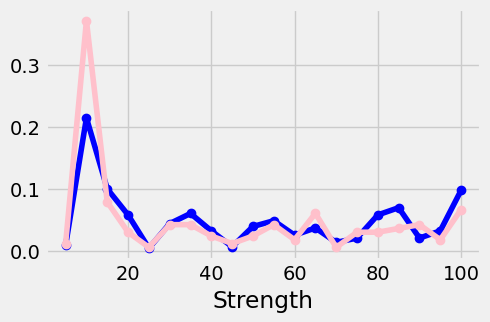

In [24]:
#Grafico ottenuto usando le frequenze relative 
male_eye_freq = (pd.crosstab(index=heroes.loc[heroes['Gender']=='M',
                                                   'Eye color'],
                                 columns='Rel. freq.',
                                 normalize=True)
                        .loc[:, 'Rel. freq.'])
male_eye_freq = male_eye_freq.reindex(heroes['Eye color'].unique())
female_eye_freq = (pd.crosstab(index=heroes.loc[heroes['Gender']=='F',
                                                   'Eye color'],
                                 columns='Rel. freq.',
                                 normalize=True)
                        .loc[:, 'Rel. freq.'])
female_eye_freq = female_eye_freq.reindex(heroes['Eye color'].unique())
male_strength_freq = (pd.crosstab(index=heroes.loc[heroes['Gender']=='M',
                                                   'Strength'],
                                 columns='Rel. freq.',
                                 normalize=True)
                        .loc[:, 'Rel. freq.'])
male_strength_freq = male_strength_freq.reindex(heroes['Strength'].unique()).dropna().sort_index()
                                                       
female_strength_freq = (pd.crosstab(index=heroes.loc[heroes['Gender']=='F',
                                                     'Strength'],
                                   columns='Rel. freq.',
                                   normalize=True)
                          .loc[:, 'Rel. freq.'])
male_strength_freq = male_strength_freq.reindex(heroes['Strength'].unique()).dropna().sort_index()

male_strength_freq.plot(marker='o', color='blue', legend=False)
female_strength_freq.plot(marker='o', color='pink', legend=False)
plt.show()

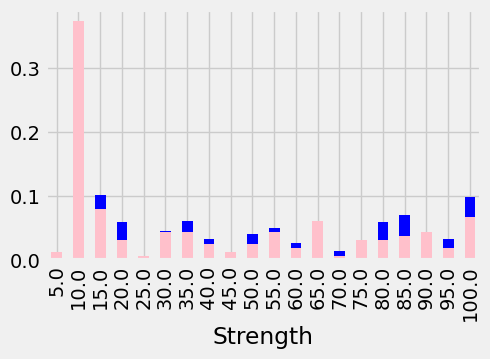

In [25]:
#Grafico a barre 'sovrapposto'
male_strength_freq.plot.bar(color='blue', legend=False)
female_strength_freq.plot.bar(color='pink', legend=False)
plt.show()

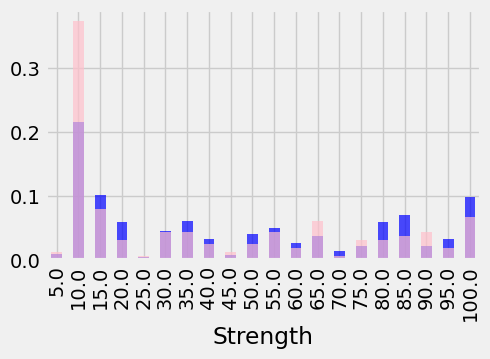

In [26]:
#Grafico a barre 'semitrasparenti'
male_strength_freq.plot.bar(color='blue', alpha=.7)
female_strength_freq.plot.bar(color='pink', alpha=.7)
plt.show()

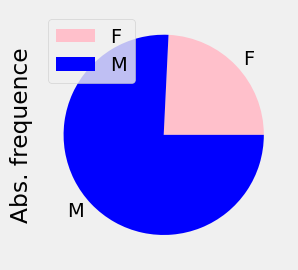

In [32]:
#Grafici a torta
gender_freq.plot.pie(y='Abs. frequence', colors=['pink', 'blue'])
plt.show()

In [33]:
#Grafici delle frequenze assolute

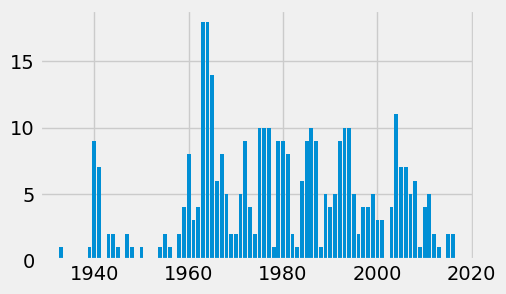

In [34]:
first_app_freq = heroes_with_year['First appearance'].value_counts()
plt.bar(first_app_freq.index, first_app_freq.values)
plt.show()

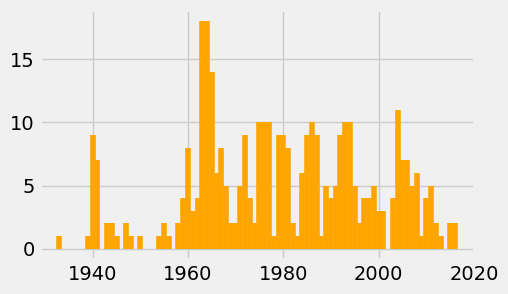

In [39]:
#Grafico 'a bastoncini'
plt.vlines(first_app_freq.index, 0, first_app_freq.values, color = 'orange')
plt.show()

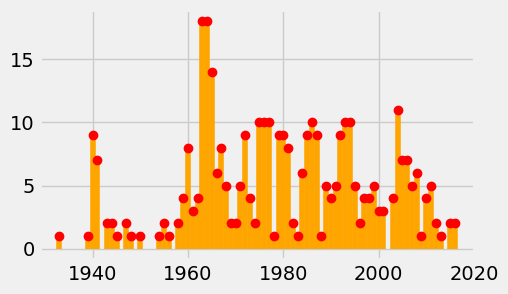

In [42]:
#Con dei puntini per indicare la frequenza assoluta
plt.vlines(first_app_freq.index, 0, first_app_freq.values, color = 'orange')
plt.plot(first_app_freq.index, first_app_freq.values, 'o', color = 'red')
plt.show()

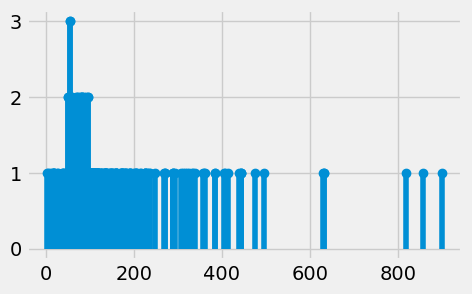

In [43]:
#Altro esempio di diagramma a bastonicini
weight_freq = heroes['Weight'].value_counts()

plt.vlines(weight_freq.index, 0, weight_freq.values)
plt.plot(weight_freq.index, weight_freq.values, 'o')
plt.show()

In [46]:
#Istogramma

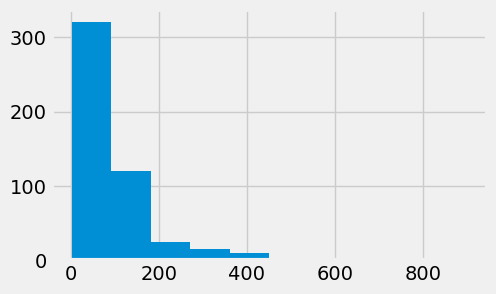

In [47]:
heroes['Weight'].hist()
plt.show()

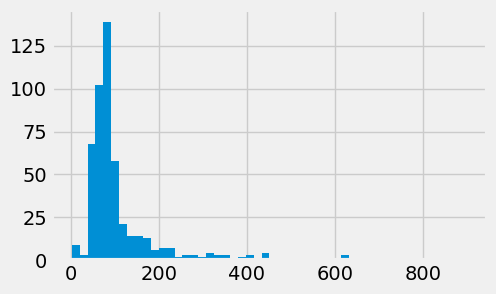

In [48]:
#Considerando solo sottointervalli
heroes['Weight'].hist(bins=50)
plt.show()

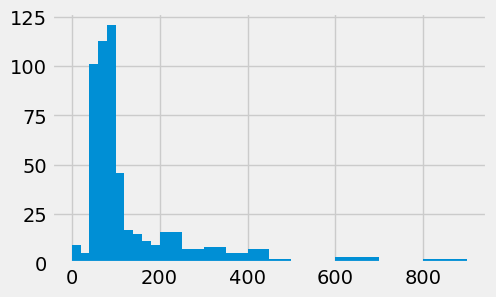

In [50]:
#Con sottointervalli diversi
heroes['Weight'].hist(bins=np.hstack((np.arange(0, 200, 20),
                                      np.arange(200, 500, 50),
                                      np.arange(500, 1000, 100))))
plt.show()

In [51]:
#FREQUENZE CUMULATE

In [52]:
'''Dato il dataset heroes, vogliamo rispondere alle seguenti domande:
        1. Qual è il più recente tra gli anni di apparizione di un supereroe?
        2. E qual è il meno recente?
        3. Quanti supereroi hanno un anno di apparizione non superiore al 1970?
        4. Quanti hanno un anno di apparizione successivo al 1980?
'''
#Rispondiamo alle prime due in modo semplice
(heroes_with_year['First appearance'].min(), heroes_with_year['First appearance'].max())


(1933.0, 2016.0)

In [53]:
#Rispondiamo alle ultime due usando le frequenze cumulate

In [54]:
first_app_freq_cumulate = (pd.crosstab(index=heroes_with_year['First appearance'],
                                       columns=['Cumulate freq.'],
                                       colnames=[''])
                             .cumsum())
first_app_freq_cumulate.iloc[:10] # per brevità visualizziamo solo i primi dieci elementi

,Cumulate freq.
First appearance,
1933.0,1
1939.0,2
1940.0,11
1941.0,18
1943.0,20
1944.0,22
1945.0,23
1947.0,25
1948.0,26


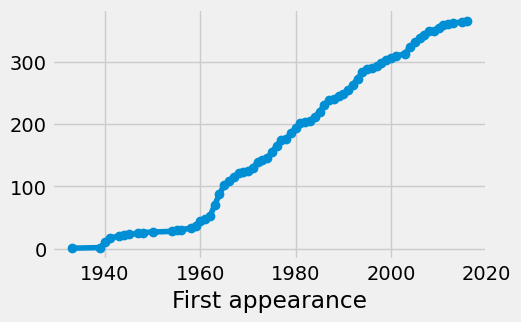

In [57]:
#Grafico delle frequenze cumulate
first_app_freq_cumulate.plot(marker='o', legend=False)
plt.show()

In [58]:
#Rispondiamo quindi alle ultime due domande

In [59]:
first_app_freq_cumulate.at[1970.0, 'Cumulate freq.']

125

In [60]:
first_app_freq_cumulate.iat[-1, 0] - first_app_freq_cumulate.at[1980.0, 'Cumulate freq.']

172

In [61]:
#Tabella delle frequenze cumulate
first_app_relfreq_cumulate = (pd.crosstab(index=heroes_with_year['First appearance'],
                              columns=['Cumulate freq.'],
                              colnames=[''],
                              normalize=True).cumsum())

first_app_relfreq_cumulate.iloc[-10:]

,Cumulate freq.
First appearance,
2006.0,0.923497
2007.0,0.937158
2008.0,0.953552
2009.0,0.956284
2010.0,0.967213
2011.0,0.980874
2012.0,0.986339
2013.0,0.989071
2015.0,0.994536


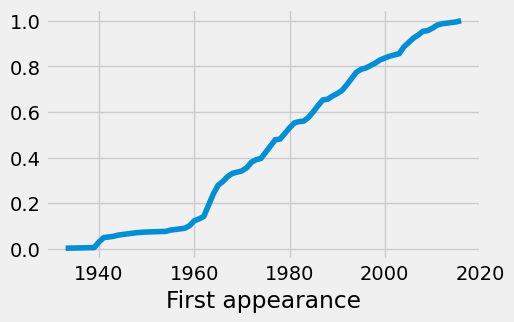

In [63]:
#Visualizzazione grafica frequenze cumulate
first_app_relfreq_cumulate.plot(legend=False)
plt.show()

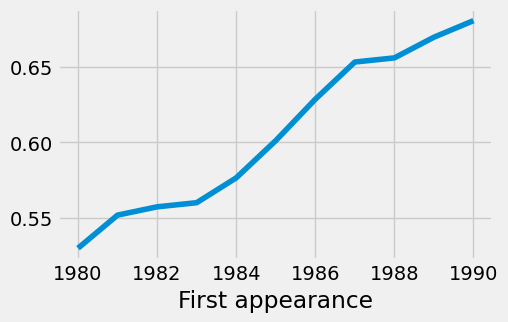

In [64]:
#Su un range di valori
first_app_relfreq_cumulate[1980:1990].plot(legend=False)
plt.show()

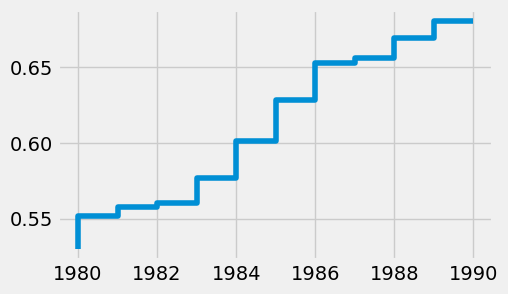

In [65]:
#Grafico relativo alla funzione indicatrice
import statsmodels.api as sm

ecdf = sm.distributions.ECDF(heroes_with_year['First appearance'])
x = np.arange(1980, 1991)
y = ecdf(x)
plt.step(x, y)
plt.show()

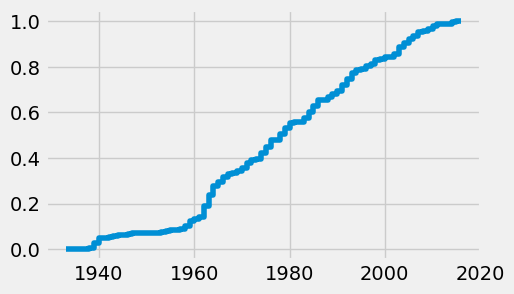

In [66]:
#Usando dei punti
min_year = min(heroes_with_year['First appearance'])
max_year = max(heroes_with_year['First appearance'])
x = np.arange(min_year, max_year+1)
y = ecdf(x)
plt.step(x, y)
plt.show()

In [67]:
#DIAGRAMMI DI PARETO

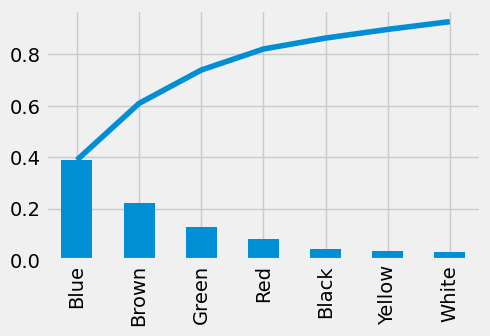

In [68]:
#Primo esempio
eye_color = heroes['Eye color']
eye_color_freq = eye_color.value_counts(normalize=True)

eye_color_freq[eye_color_freq>.02].cumsum().plot()
eye_color_freq[eye_color_freq>.02].plot.bar()
plt.show()

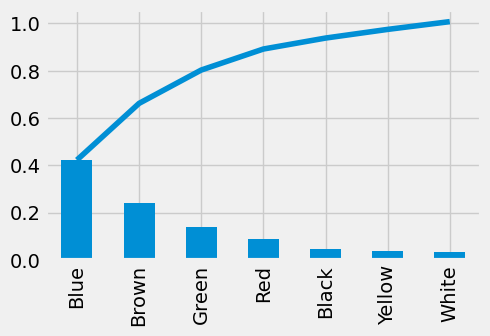

In [69]:
#Estensione fino all'ordinata unitaria
sum(eye_color_freq[eye_color_freq>.02])

norm_eye_color_freq = eye_color_freq[eye_color_freq>.02]/0.92
norm_eye_color_freq.cumsum().plot()
norm_eye_color_freq.plot.bar()
plt.show()

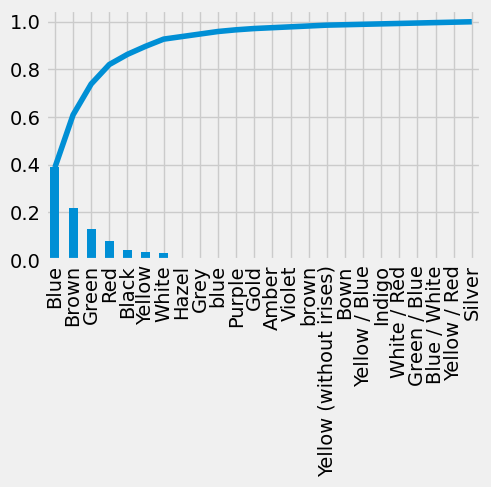

In [70]:
#Considerando tutti i dati
def my_pareto(data, threshold=0.02, renormalize=False):
    freq = data.value_counts(normalize=True)
    freq = freq[freq > threshold]
    if renormalize:
        freq = freq / sum(freq)
    freq.cumsum().plot()
    freq.plot.bar()

my_pareto(heroes['Eye color'], threshold=0)

C:\Users\cola0\anaconda3\lib\site-packages\paretochart\paretochart.py:198: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(yt)


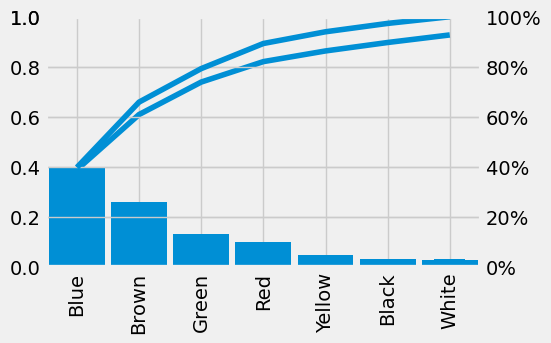

In [78]:
#Altra visualizzazione
my_pareto(heroes['Eye color'], threshold=0.015)


from paretochart import pareto

eye_color = heroes_with_year['Eye color']
eye_color_freq = eye_color.value_counts(normalize=True)

common_colors = eye_color_freq[eye_color_freq > .02].index
common_color_data = eye_color[eye_color.isin(common_colors)]

pareto(common_color_data.value_counts(normalize=True),
       labels=common_colors)
       
plt.show()

In [ ]:
#FREQUENZE CONGIUNTE E MARGINALI

In [79]:
#Frequenze congiunte
int_gender_freq = pd.crosstab(index=heroes['Intelligence'], 
                              columns=heroes['Gender'])

int_gender_freq

Gender,F,M
Intelligence,,
average,38,101
good,78,165
high,27,112
low,0,13
moderate,21,37


In [81]:
#Modificando l'ordine delle righe
int_gender_freq = int_gender_freq.reindex(['low', 'moderate',
                                           'average', 'good', 'high'])
int_gender_freq

Gender,F,M
Intelligence,,
low,0,13
moderate,21,37
average,38,101
good,78,165
high,27,112


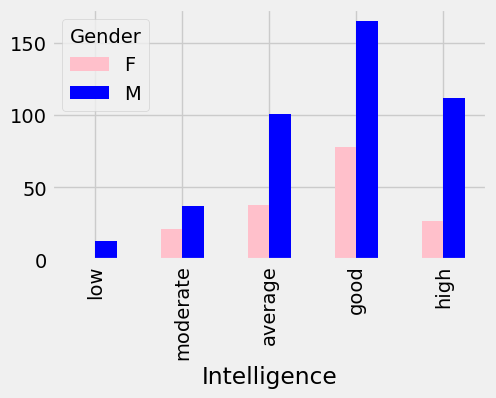

In [82]:
#Diagrammi a due barre per volta 

#Caso 1
int_gender_freq.plot.bar(color=['pink', 'blue'])
plt.show()

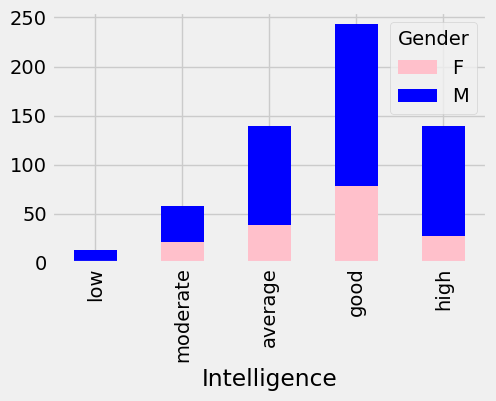

In [83]:
#Caso 2
int_gender_freq.plot.bar(color=['pink', 'blue'], stacked=True)
plt.show()

In [84]:
#Frequenze congiunte con caratteri numerici
pd.crosstab(index=heroes['Weight'], columns=[heroes['Gender']]).iloc[:10,:]


Gender,F,M
Weight,,
2.34,0,1
4.82,0,1
9.79,0,1
14.67,0,1
16.20,0,1
17.01,0,1
18.11,0,1
18.45,0,1
19.00,0,1


In [85]:
#Su un certo range
pd.crosstab(index=pd.cut(heroes['Weight'],
                         bins=[30, 50, 80, 100, 200, 500, 1000]),
            columns=[heroes['Gender']])

Gender,F,M
Weight,,
"(30, 50]",4,4
"(50, 80]",116,88
"(80, 100]",5,111
"(100, 200]",11,84
"(200, 500]",5,38
"(500, 1000]",1,5


In [86]:
#Aggiungendo i totali in un'altra colonna
pd.crosstab(index=heroes['Intelligence'], 
            columns=heroes['Gender'], margins=True)

Gender,F,M,All
Intelligence,,,
average,38,101,139
good,78,165,243
high,27,112,139
low,0,13,13
moderate,21,37,58
All,164,428,592


In [87]:
#FREQUENZE CONGIUNTE RELATIVE